In [1]:
import sys
sys.path.append("../")
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
%matplotlib notebook
from matplotlib import cm
from netCDF4 import Dataset,MFDataset

%load_ext autoreload
%autoreload 2

import pyfesom as pf
%aimport pyfesom

no cmocean


In [2]:
meshpath_z = '/work/ollie/orichter/mesh/oce0_z'
mesh_z = pf.fesom_mesh(meshpath_z, abg=[0,0,0],cavity=False) ## for melt rate we need to deactivate cavity

meshpath_s = '/work/ollie/orichter/mesh/oce0_s'
mesh_s = pf.fesom_mesh(meshpath_s, abg=[0,0,0],cavity='sigma') ## for melt rate we need to deactivate cavity

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [20]:
def plot_mean_melt(ax,mesh,case,coord,ls):
    m=[]
    g=[]
    for gammaT in np.append(np.arange(0.01,0.11,0.01),[0.12,0.14,0.16,0.18,0.20]):
        print('processing '+case+coord+'_{:.2f}'.format(gammaT))
        try:
            diag = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/'+case+'_'+coord+'_{:.2f}/RG47911.202?.forcing.diag.nc'.format(gammaT))))
            nod2d = np.arange(mesh.n2d)
            nod_melt = nod2d[mesh.zcoord[nod2d]>300]
            mean_melt = np.mean(diag['wnet'][24:30,nod_melt]*3600*24*365.25)
            #mean_melt = np.mean(diag['wnet'][12,nod_melt]*3600*24*365.25)
            g.append(gammaT)
            m.append(mean_melt)
        except:
            print(coord+'_{:.2f}'.format(gammaT)+' doesnt work!')
  
        print(mean_melt)
    ax.plot(g,m,label=case+'_'+coord,ls=ls)
    return ax       

processing oce0comz_0.01
9.89542
processing oce0comz_0.02
16.5425
processing oce0comz_0.03
20.2824
processing oce0comz_0.04
22.7621
processing oce0comz_0.05
24.6997
processing oce0comz_0.06
25.5193
processing oce0comz_0.07
26.8477
processing oce0comz_0.08
27.6531
processing oce0comz_0.09
28.4719
processing oce0comz_0.10
28.9187
processing oce0comz_0.12
30.1038
processing oce0comz_0.14
30.928
processing oce0comz_0.16
31.3388
processing oce0comz_0.18
32.0073
processing oce0comz_0.20
32.8638


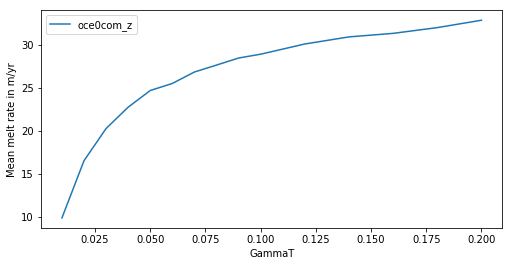

In [21]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(8.27,4))

#ax = plot_mean_melt(ax,mesh_s,'oce0','s','dashed')
#ax = plot_mean_melt(ax,mesh_s,'oce0com','s','dashed')
#ax = plot_mean_melt(ax,mesh_z,'oce0','z','solid')
ax = plot_mean_melt(ax,mesh_z,'oce0com','z','solid')

plt.legend()
plt.xlabel('GammaT')
plt.ylabel('Mean melt rate in m/yr')
#plt.ylim(bottom=0)
plt.show()

<IPython.core.display.Javascript object>


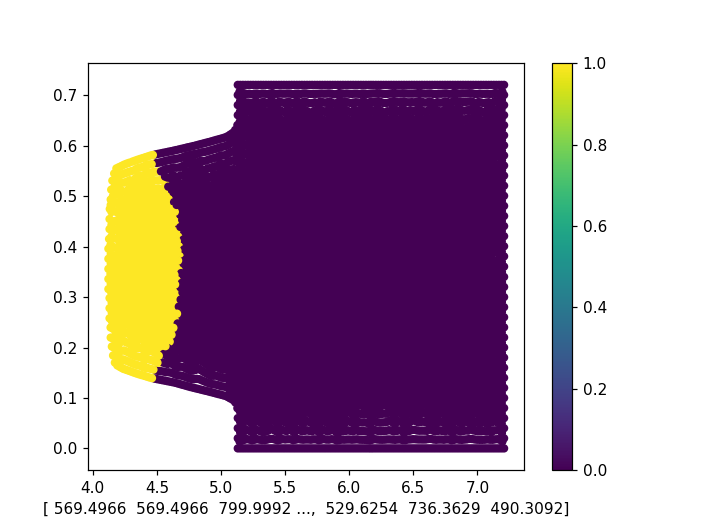

In [6]:
nod2d = np.arange(mesh_z.n2d)
mask = np.zeros_like(nod2d)
mask[mesh_z.zcoord[nod2d]>300]=1.0
plt.scatter(mesh_z.x2,mesh_z.y2,20,mask)
plt.xlabel(mesh_z.x2*111)
plt.colorbar()

For depth 0 model level -0.0 will be used


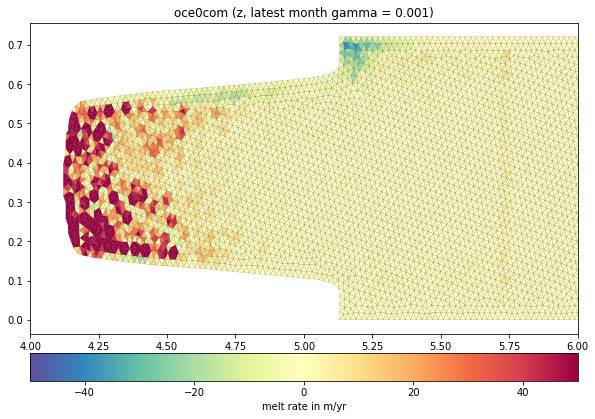

In [26]:
fl = Dataset('/work/ollie/orichter/data/oce0com_z_0.80/RG47911.2023.forcing.diag.nc')
level_data, elem_no_nan = pf.get_data(np.mean(fl['wnet'][:,:],0),mesh_z,0)

plt.figure(figsize=(8.27,6))

level_data = level_data*360*24*3600
plt.tripcolor(mesh_z.x2, mesh_z.y2, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r,
             vmin = -50,
             vmax = 50)
cbar = plt.colorbar(orientation='horizontal', pad=0.05,cmap='bwr');
cbar.set_label("melt rate in m/yr")
plt.title('oce0com (z, latest month gamma = 0.001)')
plt.tight_layout()
plt.xlim(4.0,6.0)
#plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_melt_"+year_out+".png")
plt.show()


In [7]:
fl['wnet']

<type 'netCDF4._netCDF4.Variable'>
float32 wnet(T, nodes_2d)
    description: net freshwater flux to ocean, downward positive
    units: m/s
unlimited dimensions: T
current shape = (12, 5855)
filling off

In [ ]:
plt.figure(figsize=(8.27,6))
level_data, elem_no_nan = pf.get_data(np.mean(fl['wnet'][:],0),mesh,0)
level_data = level_data*360*24*3600
plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r,
             vmin = -100,
             vmax = 100)
cbar = plt.colorbar(orientation='horizontal', pad=0.05);
cbar.set_label("melt rate in m/yr")
plt.title('Year: '+year_out)
plt.tight_layout()
plt.xlim(3.5,5)
plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_melt_"+year_out+".png")
#plt.show()
plt.close()

In [9]:
def plot_mean_melt_evo(ax,mesh,coord,gammaT,ls):
    
    diag = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0com_'+coord+'_{:.2f}/RG47911.202?.forcing.diag.nc'.format(gammaT))))
    
    nod2d = np.arange(mesh.n2d)
    nod_melt = nod2d[mesh.zcoord[nod2d]>300]
    mean_melt = np.mean(diag['wnet'][1:41,nod_melt]*3600*24*365.25,1)

    ax.plot(mean_melt,label=coord+'_{:.3f}'.format(gammaT),ls=ls)
    
    return ax

In [15]:
diag = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0comdw_z_0.10/RG47911.202?.forcing.diag.nc')))
nod2d = np.arange(mesh_z.n2d)
nod_melt = nod2d[mesh_z.zcoord[nod2d]>300]
mean_melt = np.mean(diag['wnet'][:,nod_melt]*3600*24*365.25,1)

<IPython.core.display.Javascript object>


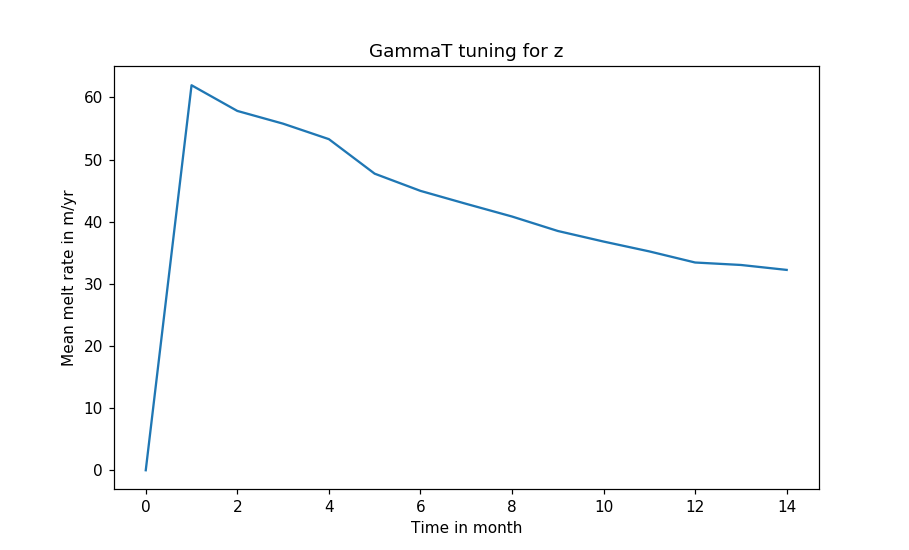

In [16]:
fig,ax = plt.subplots(figsize=(8.27,5))
ax.plot(mean_melt)
plt.legend()
plt.xlabel('Time in month')
plt.ylabel('Mean melt rate in m/yr')
#plt.ylim((-1,50))
plt.title('GammaT tuning for z')
plt.show()

processing z_0.80


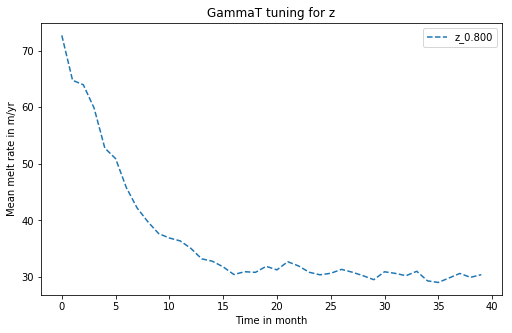

In [5]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(8.27,5))

for gammaT in np.arange(0.8,0.9,0.1):
    print("processing z_{:.2f}".format(gammaT))
    
    try:
        ax = plot_mean_melt_evo(ax,mesh_z,'z',gammaT,'dashed')
    except:
        print("z_{:.2f} didn't work".format(gammaT))

plt.legend()
plt.xlabel('Time in month')
plt.ylabel('Mean melt rate in m/yr')
#plt.ylim((-1,50))
plt.title('GammaT tuning for z')
plt.show()

processing s_0.010
s_0.010 didn't work
processing s_0.060
s_0.060 didn't work
processing s_0.110
s_0.110 didn't work
processing s_0.160
s_0.160 didn't work
processing s_0.210
s_0.210 didn't work
processing s_0.260
s_0.260 didn't work
processing s_0.310
s_0.310 didn't work
processing s_0.360
s_0.360 didn't work
processing s_0.410
s_0.410 didn't work
processing s_0.460
s_0.460 didn't work


/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


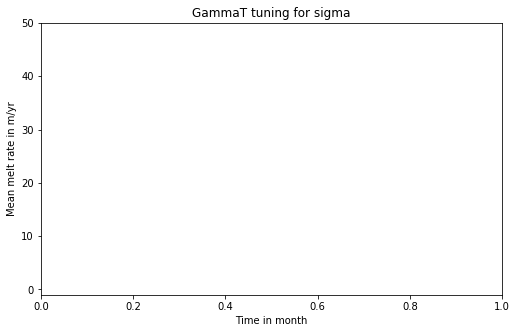

In [5]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(8.27,5))

for gammaT in np.arange(0.01,0.51,0.05):
    print("processing s_{:.3f}".format(gammaT))
    
    try:
        ax = plot_mean_melt_evo(ax,mesh_s,'s',gammaT,'solid')
    except:
        print("s_{:.3f} didn't work".format(gammaT))

plt.legend()
plt.xlabel('Time in month')
plt.ylabel('Mean melt rate in m/yr')
plt.ylim((-1,50))
plt.title('GammaT tuning for sigma')
plt.show()

In [21]:
diag = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0_z_{:.2f}/RG47911.202?.forcing.diag.nc'.format(0.05))))
nod2d = np.arange(mesh_z.n2d)
nod_melt = nod2d[mesh_z.zcoord[nod2d]>300]
#mean_melt = np.mean(diag['wnet'][-6:,nod_melt]*3600*24*365.25)
mean_melt = diag['wnet'][24,nod_melt]*3600*24*365.25

In [ ]:
f

In [31]:
mesh = mesh_z
diag = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0_z_0.03/RG47911.202?.forcing.diag.nc')))
nod2d = np.arange(mesh.n2d)
nod_melt = nod2d[mesh.zcoord[nod2d]>300]
mean_melt = np.mean(diag['wnet'][-6:,nod_melt]*3600*24*365.25)
mean_melt

30.704416

<IPython.core.display.Javascript object>


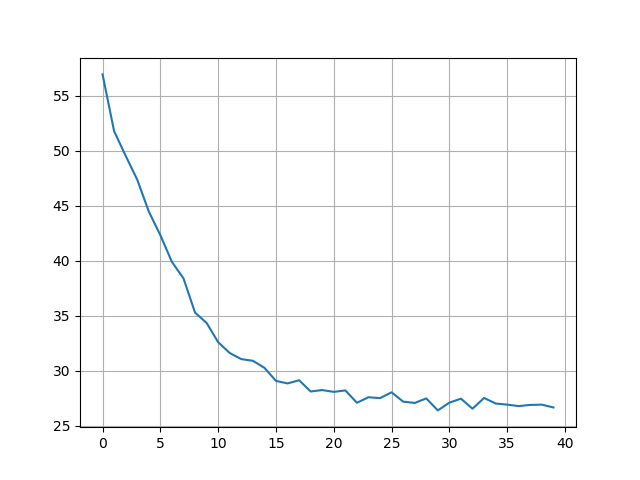

In [5]:
fig,ax = plt.subplots()
ax = plot_mean_melt_evo(ax,mesh_z,'z',0.50,'solid')
ax.grid()
plt.show()

# oce0cold

processing z_0.01
processing z_0.06
processing z_0.11


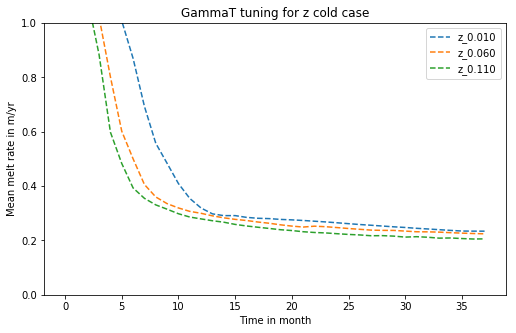

In [14]:
%matplotlib inline

def plot_mean_melt_evo(ax,mesh,coord,gammaT,ls):
    
    diag = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0cold_'+coord+'_{:.2f}/RG47911.202?.forcing.diag.nc'.format(gammaT))))
    
    nod2d = np.arange(mesh.n2d)
    nod_melt = nod2d[mesh.zcoord[nod2d]>300]
    mean_melt = np.mean(diag['wnet'][1:41,nod_melt]*3600*24*365.25,1)

    ax.plot(mean_melt,label=coord+'_{:.3f}'.format(gammaT),ls=ls)
    
    return ax

fig,ax = plt.subplots(figsize=(8.27,5))

for gammaT in np.arange(0.01,0.13,0.05):
    print("processing z_{:.2f}".format(gammaT))
    
    try:
        ax = plot_mean_melt_evo(ax,mesh_z,'z',gammaT,'dashed')
    except:
        print("z_{:.2f} didn't work".format(gammaT))

plt.legend()
plt.xlabel('Time in month')
plt.ylabel('Mean melt rate in m/yr')
plt.ylim((0,1))
plt.title('GammaT tuning for z cold case')
plt.show()

processing s_0.010
processing s_0.020
processing s_0.030
processing s_0.040
processing s_0.050
s_0.050 didn't work
processing s_0.060
processing s_0.070
processing s_0.080
processing s_0.090
processing s_0.100
s_0.100 didn't work
processing s_0.110
s_0.110 didn't work
processing s_0.120
s_0.120 didn't work


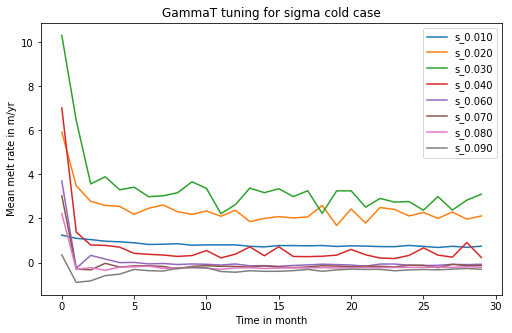

In [15]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(8.27,5))

for gammaT in np.arange(0.01,0.13,0.01):
    print("processing s_{:.3f}".format(gammaT))
    
    try:
        ax = plot_mean_melt_evo(ax,mesh_s,'s',gammaT,'solid')
    except:
        print("s_{:.3f} didn't work".format(gammaT))

plt.legend()
plt.xlabel('Time in month')
plt.ylabel('Mean melt rate in m/yr')
#plt.ylim((-1,50))
plt.title('GammaT tuning for sigma cold case')
plt.show()

In [12]:
def plot_mean_melt(ax,mesh,coord,ls):
    m=[]
    g=[]
    for gammaT in np.arange(0.01,0.11,0.01):
        try:
            diag = MFDataset(sorted(glob.glob('/work/ollie/orichter/data/oce0cold_'+coord+'_{:.2f}/RG47911.202?.forcing.diag.nc'.format(gammaT))))
            nod2d = np.arange(mesh.n2d)
            nod_melt = nod2d[mesh.zcoord[nod2d]>300]
            mean_melt = np.mean(diag['wnet'][-6:,nod_melt]*3600*24*365.25)
            g.append(gammaT)
            m.append(mean_melt)
        except:
            print(coord+'_{:.2f}'.format(gammaT)+' doesnt work!')
  

    ax.plot(g,m,label=coord,ls=ls)
    return ax       

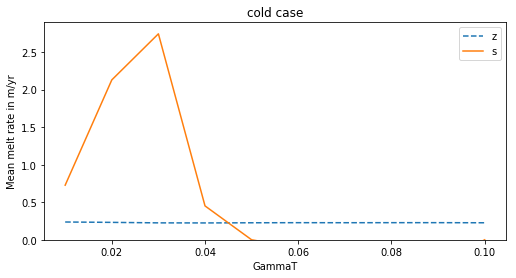

In [16]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(8.27,4))

ax = plot_mean_melt(ax,mesh_z,'z','dashed')
ax = plot_mean_melt(ax,mesh_s,'s','solid')

plt.legend()
plt.xlabel('GammaT')
plt.ylabel('Mean melt rate in m/yr')
plt.ylim(bottom=0)
plt.title('cold case')
plt.show()